### 문제 3

In [8]:
# 3-1
import numpy as np

nx, nh, ny = 3, 11, 2
U = np.random.randn(nx, nh)*2
W = np.random.randn(nh, ny)*2
learning_rate = 0.1

def sigmoid(v):
    return 1 / (1 + np.exp(-v))

input = np.zeros(nx)

h_out, h_deriv = np.zeros(nh), np.zeros(nh)
h_delta        = np.zeros(nh)

y_out, y_deriv = np.zeros(ny), np.zeros(ny)
y_delta        = np.zeros(ny)

def forward(x):
    global input, h_out, h_deriv, y_out, y_deriv
  
    input = x

    h_out   = sigmoid(U.T.dot(input))
    h_deriv = h_out * (1 - h_out)

    y_out   = sigmoid(W.T.dot(h_out))
    y_deriv = y_out * (1 - y_out)

def compute_error(target):
  return y_out - target

def backward(error):
    global y_delta, W, h_delta, U

    y_delta = y_deriv * error
    dW      = -learning_rate * np.outer(h_out, y_delta)

    W = W + dW
    h_delta = h_deriv * W.dot(h_delta)
    dU      = -learning_rate * np.outer(input, h_delta)

def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e**2

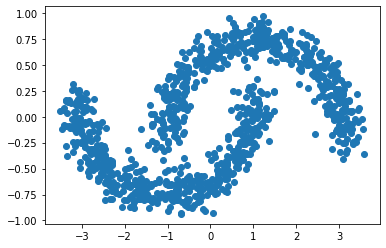

In [9]:
# 3-2
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/twisted_data.csv')
plt.scatter(data['x1'], data['x2'])

In [7]:
# 3-3
loss = []
X       = data['x1'].to_numpy()
y_label = data['x2'].to_numpy()

for i in range(100):
    e_accum = 0
    for x, y in zip(X, y_label):
        e_accum += train(x, y)
    loss.append(e_accum)

err_log = np.array(loss).flatten()
plt.plot(err_log)
plt.show()

NameError: name 'V' is not defined

In [ ]:
# 3-4
